## Dependencies

In [1]:
import numpy as np
import pandas as pd

import utils, constants, training

## I/O - Initialization

In [2]:
# select the channels to be processed
dataset = utils.data_loader(path = constants.MAIN_CSV_FILE)
reduced_dataset = utils.channel_selection(dataset, constants.SELECTED_CHANNELS)
data = utils.data_preparation(dataset=reduced_dataset, feature_subset=constants.ALL_FEATURES)

## Training

In [3]:
model_accs = {}
for model in constants.ALL_MODELS:
    model_accs[model] = training.model_training(data, model, stats=True, cm=False)


==== Stats_dict for the K-NN model ====
Training Accuracy:  0.7497681607418857
Test Accuracy:  0.7478368355995055
Sensitivity (Recall): 0.7552795031055901
Precision: 0.7423687423687424
F1_score: 0.7487684729064039
AUC: 0.7478734538898184
Logloss: 9.088881695154388


==== Stats_dict for the SVM model ====
Training Accuracy:  1.0
Test Accuracy:  0.907292954264524
Sensitivity (Recall): 0.9304347826086956
Precision: 0.8884934756820878
F1_score: 0.9089805825242718
AUC: 0.9074068131985668
Logloss: 3.3415006232185247


==== Stats_dict for the DTC model ====
Training Accuracy:  0.8284389489953632
Test Accuracy:  0.76946847960445
Sensitivity (Recall): 0.7515527950310559
Precision: 0.7776349614395887
F1_score: 0.764371446620341
AUC: 0.7693803335548883
Logloss: 8.309198216403397


==== Stats_dict for the RFC model ====
Training Accuracy:  1.0
Test Accuracy:  0.8393077873918418
Sensitivity (Recall): 0.8571428571428571
Precision: 0.8263473053892215
F1_score: 0.8414634146341463
AUC: 0.8393955368125

/Users/kemalcankucuk/Documents/PAWS Work/eeg-attention/paws/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



==== Stats_dict for the NN-def model ====
Training Accuracy:  0.9496136012364761
Test Accuracy:  0.8343634116192831
Sensitivity (Recall): 0.8732919254658386
Precision: 0.80897583429229
F1_score: 0.8399044205495818
AUC: 0.8345549418227102
Logloss: 5.97014778015043


==== Stats_dict for the SVM-def model ====
Training Accuracy:  0.8432766615146832
Test Accuracy:  0.8176761433868974
Sensitivity (Recall): 0.8273291925465839
Precision: 0.8102189781021898
F1_score: 0.8186846957590659
AUC: 0.8177236368636978
Logloss: 6.5716178923297655


==== Stats_dict for the XGB model ====
Training Accuracy:  1.0
Test Accuracy:  0.865265760197775
Sensitivity (Recall): 0.8807453416149068
Precision: 0.8531889290012034
F1_score: 0.8667481662591687
AUC: 0.8653419204999503
Logloss: 4.856314239077589



In [4]:
model_test_accs = {}
for model in model_accs:
    model_test_accs[model] = model_accs[model]['test_acc']

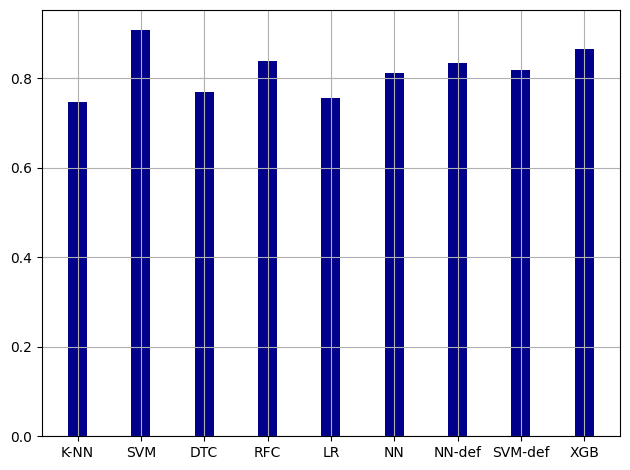

In [5]:
import matplotlib.pyplot as plt
#for key in model_accs:
#    x = np.linspace(1,len(model_accs[key]), len(model_accs[key]))
#    plt.plot(x, model_accs[key])
plt.rcParams["figure.autolayout"] = True
plt.bar(model_test_accs.keys(), model_test_accs.values(), color ='darkblue', 
        width = 0.3)        
plt.grid()
#plt.legend(models)
plt.savefig('model accuracy comparison.png', bbox_inches='tight', dpi=500)
plt.show()
